<a href="https://colab.research.google.com/github/RosaR02/Sales-Predictions/blob/main/Project_1_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

###Rosa Rocha

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [59]:
#Explore the data - what do you need to do to clean this data? Clean it!

df.shape

(8523, 12)

In [60]:

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [61]:
df.duplicated().sum()

0

In [62]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
df.isna().sum() / len(df) * 100
     

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [64]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [65]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

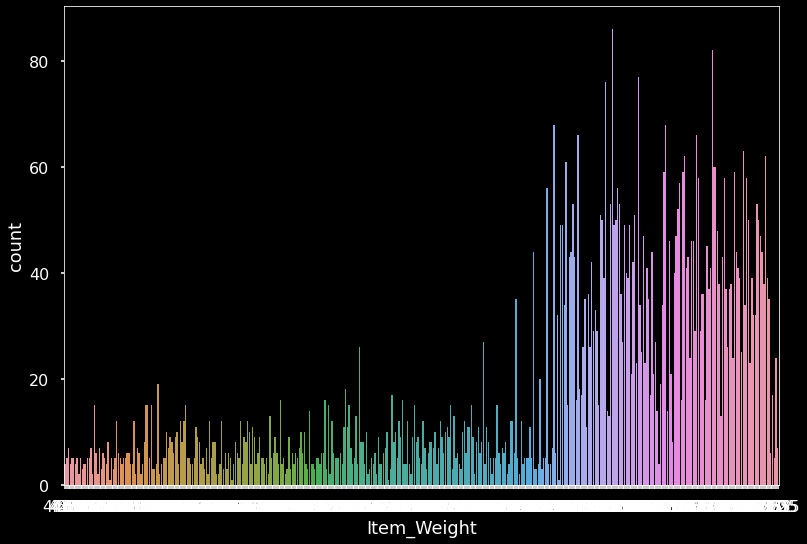

In [66]:
ax = sns.countplot(data = df, x = 'Item_Weight');

In [67]:
mean_age = df['Item_Weight'].median()
print(mean_age)



12.6


In [68]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = '12.6')

df['Item_Weight'].value_counts()

12.6     1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

In [69]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

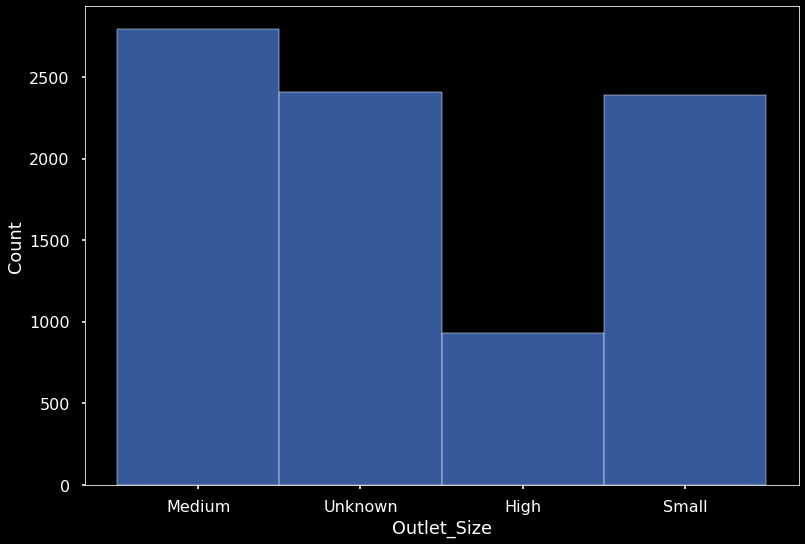

In [73]:
ax = sns.histplot(data = df, x = 'Outlet_Size')

In [74]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [75]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [76]:
pd.set_option('display.max_rows', None)
df['Item_Weight'].value_counts()
     

12.6      1463
12.15       86
17.6        82
13.65       77
11.8        76
15.1        68
9.3         68
16.7        66
10.5        66
19.35       63
20.7        62
16.0        62
9.8         61
17.75       60
17.7        60
18.85       59
15.0        59
15.85       59
16.75       58
19.6        58
18.25       58
15.7        57
12.5        56
9.195       56
12.6        53
12.1        53
10.195      53
20.2        53
15.6        52
13.5        51
11.5        51
12.35       50
20.25       50
11.6        50
19.7        50
12.3        49
9.5         49
9.6         49
12.85       49
13.15       49
17.85       48
14.0        47
20.35       47
15.5        47
16.35       46
15.2        46
16.5        46
17.25       45
14.5        44
20.5        44
9.0         44
19.0        44
10.1        44
10.0        43
18.2        43
16.2        43
10.3        43
13.35       42
11.1        42
14.15       41
19.1        41
16.1        41
17.5        41
15.35       40
13.0        40
13.1        39
19.2      

In [79]:
df['Item_Weight'] = df['Item_Weight'].astype('float')
print(df['Item_Weight'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7       12.600
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18      12.600
19      13.350
20      18.850
21      12.600
22      14.600
23      12.600
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29      12.600
30      19.250
31      18.600
32      18.700
33      17.850
34      17.500
35      10.000
36      12.600
37       8.850
38      12.600
39      12.600
40      13.350
41       9.800
42      13.600
43      21.350
44      12.150
45       6.420
46      19.600
47      10.000
48      15.850
49      12.600
50       7.390
51      10.195
52       9.895
53      10.895
54      12.150
55       7.905
56       9.195
57       8.365
58      15.100
59      12.600
60      10.000
61       7.970
62      12.600
63      12.600
64      12.600
65      17.700
66      19

In [80]:

data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [81]:

for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

In [107]:
Fat_Content = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
#print(Fat_Content)

#df['Item_fat_Content'] = df['Item_Fat_Content'].replace(Fat_Content)
new_Item_Fat_Content = df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#print(df['Item_fat_Content'])
#df['Item_fat_Content'].head()
print(new_Item_Fat_Content)

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
5       Regular
6       Regular
7       Low Fat
8       Regular
9       Regular
10      Low Fat
11      Regular
12      Regular
13      Regular
14      Low Fat
15      Regular
16      Low Fat
17      Regular
18      Low Fat
19      Low Fat
20      Regular
21      Regular
22      Low Fat
23      Low Fat
24      Regular
25      Low Fat
26      Regular
27      Low Fat
28      Regular
29      Regular
30      Low Fat
31      Low Fat
32      Low Fat
33      Low Fat
34      Low Fat
35      Low Fat
36      Regular
37      Regular
38      Regular
39      Low Fat
40      Low Fat
41      Low Fat
42      Low Fat
43      Low Fat
44      Regular
45      Low Fat
46      Low Fat
47      Low Fat
48      Regular
49      Regular
50      Low Fat
51      Low Fat
52      Regular
53      Low Fat
54      Low Fat
55      Low Fat
56      Low Fat
57      Low Fat
58      Low Fat
59      Low Fat
60      Low Fat
61      Regular
62      

In [109]:
new_Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [111]:
#df.describe().round(2)

stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

## Explanatory Visuals